In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("./dataset/ElectricCardata_Clean.csv")
df_sales = pd.read_excel("./dataset/Ev Sales.xlsx")
df_state = pd.read_csv("./dataset/EV_India.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [20]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    74 non-null     datetime64[ns]
 1   2 W     74 non-null     int64         
 2   3 W     74 non-null     int64         
 3   4 W     74 non-null     int64         
 4   BUS     74 non-null     int64         
 5   TOTAL   74 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 3.6 KB


In [22]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Sr. No.                     36 non-null     int64 
 1   State Name                  36 non-null     object
 2   Total Electric Vehicle      32 non-null     object
 3   Total Non-Electric Vehicle  32 non-null     object
 4   Total                       32 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


**Exploratory Data Analysis**

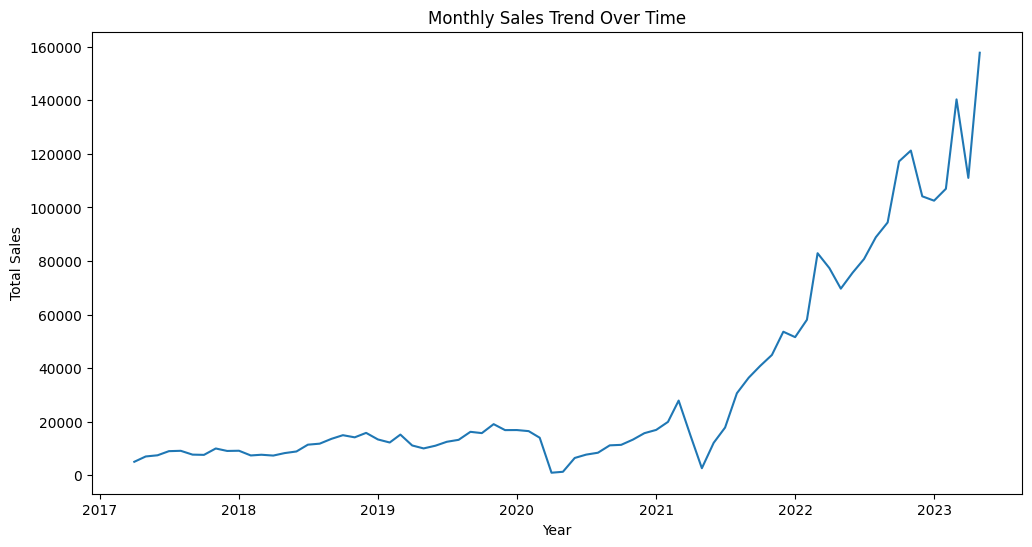

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='TOTAL', data=df_sales)
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


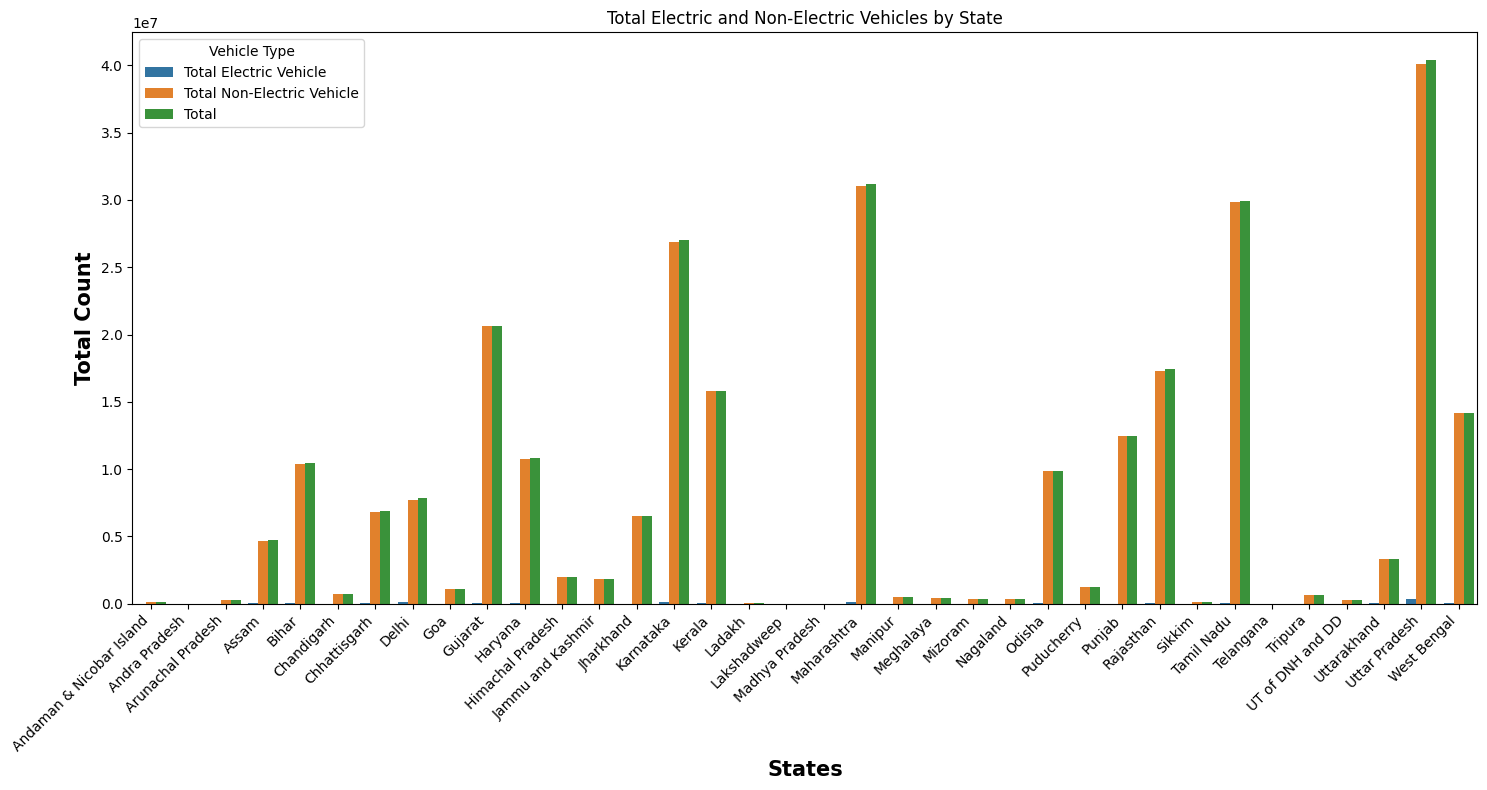

In [5]:

df_state.replace('NaN', '0', inplace=True)
df_state['Total Electric Vehicle'] = pd.to_numeric(df_state['Total Electric Vehicle'].str.replace(',', ''), errors='coerce')
df_state['Total Non-Electric Vehicle'] = pd.to_numeric(df_state['Total Non-Electric Vehicle'].str.replace(',', ''), errors='coerce')
df_state['Total'] = pd.to_numeric(df_state['Total'].str.replace(',', ''), errors='coerce')

df_melted = pd.melt(df_state, id_vars='State Name', value_vars=['Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total'],
                    var_name='Vehicle Type', value_name='Total Count')

plt.figure(figsize=(15, 8))
sns.barplot(x='State Name', y='Total Count', hue='Vehicle Type', data=df_melted)
plt.title('Total Electric and Non-Electric Vehicles by State')
plt.xlabel('States', fontweight='bold', fontsize=15)
plt.ylabel('Total Count', fontweight='bold', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

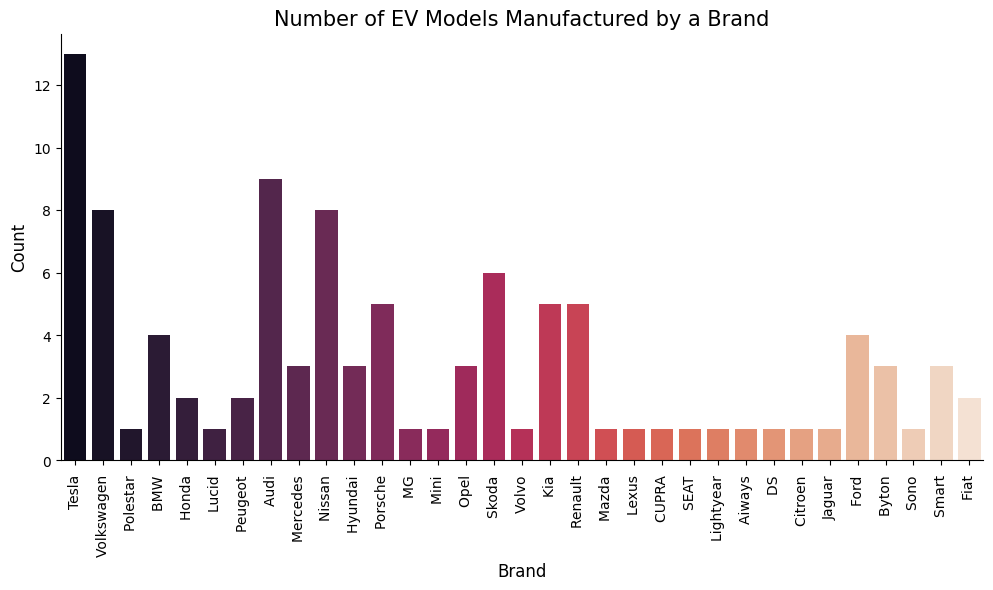

In [47]:
sns.catplot(data=df, x='Brand', kind='count', palette='rocket',aspect=2)
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Brand', size=12)
plt.ylabel('Count', size=12)
plt.title('Number of EV Models Manufactured by a Brand', size=15)
plt.show()

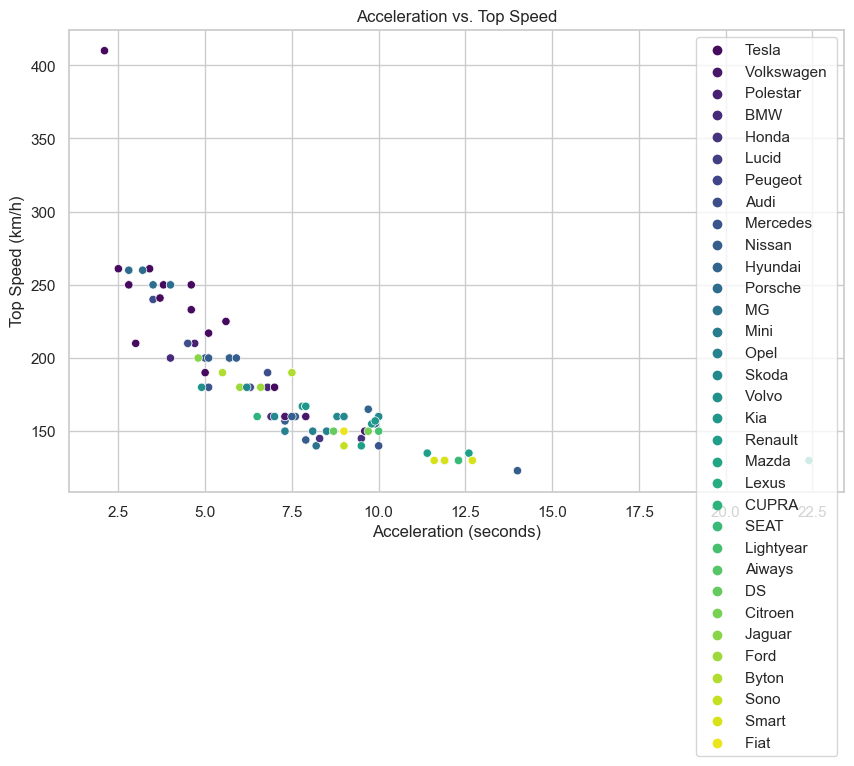

In [49]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccelSec', y='TopSpeed_KmH', data=df, hue='Brand', palette='viridis')
plt.title('Acceleration vs. Top Speed')
plt.xlabel('Acceleration (seconds)')
plt.ylabel('Top Speed (km/h)')
plt.legend()
plt.show()

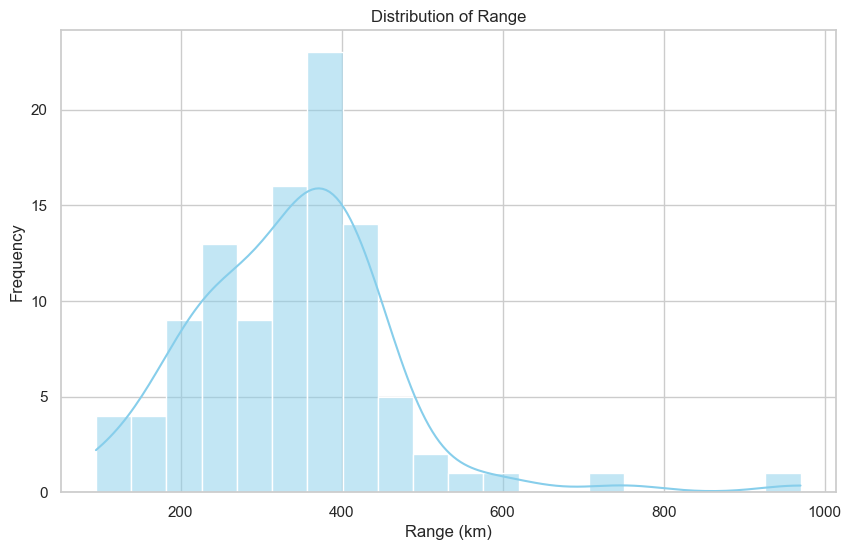

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Range_Km'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Range')
plt.xlabel('Range (km)')
plt.ylabel('Frequency')
plt.show()

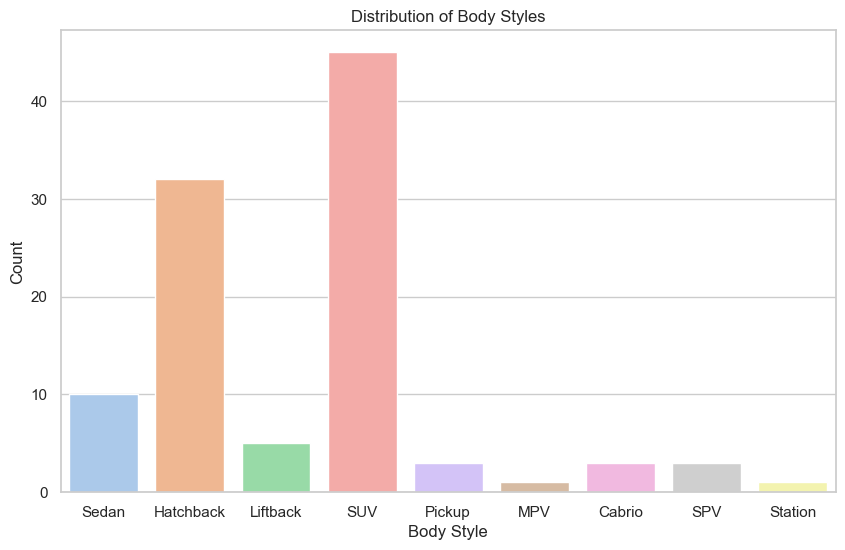

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BodyStyle', data=df, palette='pastel')
plt.title('Distribution of Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

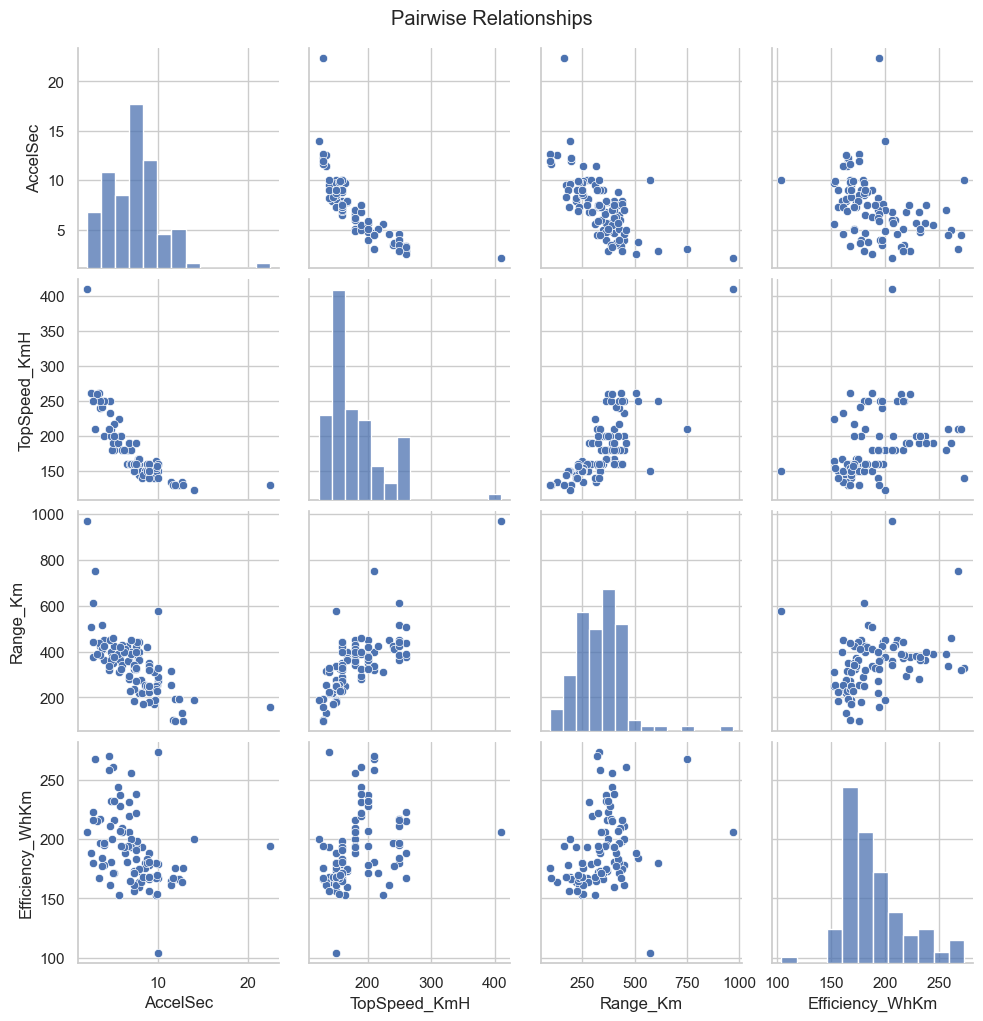

In [53]:
sns.pairplot(df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

**Clustering for Segment Analysis**

C:\Users\91735\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91735\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91735\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91735\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

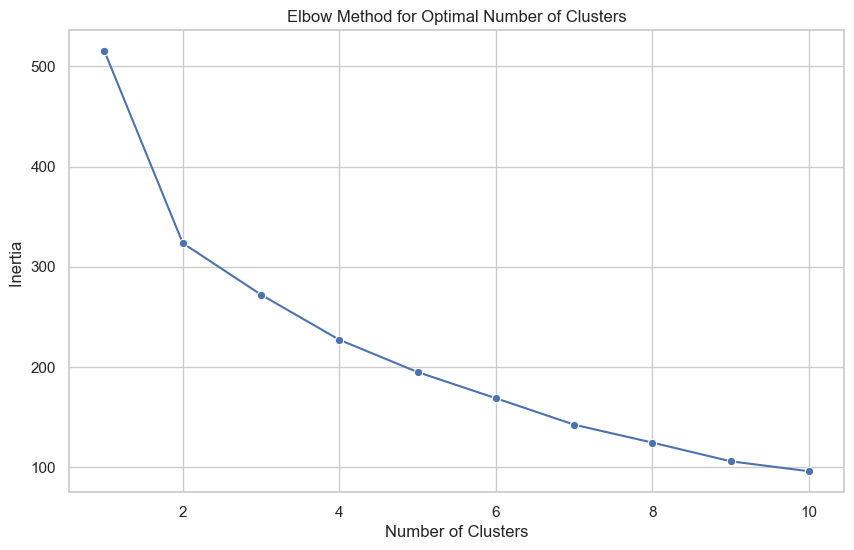

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


features_for_clustering = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Seats']


X_cluster = df[features_for_clustering]

# Standardizing the features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

# Using the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia ')
plt.show()


C:\Users\91735\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


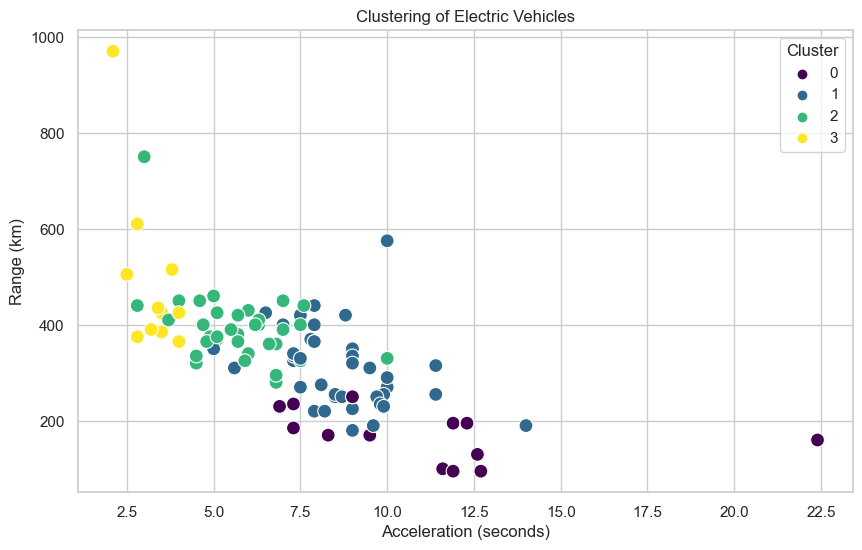

          AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm     Seats
Cluster                                                                
1        11.000000    139.666667  177.000000       168.600000  3.800000
2         8.616667    156.404762  308.928571       171.880952  5.000000
3         5.726471    194.647059  394.558824       217.823529  5.382353
4         3.350000    264.583333  487.500000       194.166667  4.416667


In [59]:

n_clusters = 4

# Creating and fitting the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccelSec', y='Range_Km', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clustering of Electric Vehicles')
plt.xlabel('Acceleration (seconds)')
plt.ylabel('Range (km)')
plt.legend(title='Cluster')
plt.show()

# Display
cluster_centers = scaler_cluster.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features_for_clustering)
cluster_centers_df['Cluster'] = range(1, n_clusters + 1)
cluster_centers_df.set_index('Cluster', inplace=True)
print(cluster_centers_df)
